# ===cell 1- Metadata===

### Course: Signals & systems-Programming Section (Python)


**Full Name:** Parniyan Alipour

**Student ID:** 402121543

**Source:**  *Signals and Systems Labratory with MATLAB*

**Problem Number (chapter.section.question-num):** 5.14.3

# ===cell 2 - Upload & display question image:===

##Problem statement image
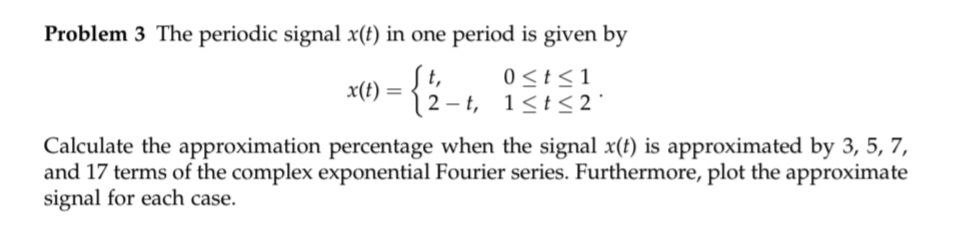

#===cell 3 - Assumptions & Methods===

<h3>Assumptions</h3>
<ul>
  <li>The signal <i>x(t)</i> is periodic with period <b>T = 2</b>.</li>
  <li>Over one period, the signal is defined as:</li>
</ul>
<pre>
x(t) =  t,      0 ≤ t ≤ 1
x(t) =  2 − t,  1 ≤ t ≤ 2
</pre>
<ul>
  <li>The fundamental angular frequency is: <b>ω₀ = 2π/T = π</b>.</li>
  <li>The signal is approximated using a finite number of complex exponential Fourier series terms with
      <b>N = 3, 5, 7, 17</b> (harmonics k = −N … N).</li>
  <li>All integrals and energies are evaluated numerically over one period <b>[0, T]</b>.</li>
</ul>

<h3>Methods Used</h3>
<ul>
  <li>Complex exponential Fourier series to compute Fourier coefficients.</li>
  <li>Numerical integration to evaluate integrals and signal energy.</li>
  <li>Partial-sum reconstruction using a finite set of harmonics.</li>
  <li>Energy-based metric to measure approximation accuracy.</li>
  <li>Time-domain plotting for visualization.</li>
</ul>

<h3>Mathematical Approach</h3>
<ul>
  <li>Fourier coefficients:</li>
</ul>
<pre>
c_k = (1/T) ∫[0 to T] x(t) e^(−j k ω₀ t) dt
</pre>
<ul>
  <li>Signal approximation (partial sum):</li>
</ul>
<pre>
x_N(t) = Σ (k = −N to N) c_k e^(j k ω₀ t)
</pre>
<ul>
  <li>Approximation percentage (energy ratio):</li>
</ul>
<pre>
Approximation Percentage =
( ∫[0 to T] |x_N(t)|² dt  /  ∫[0 to T] |x(t)|² dt ) × 100
</pre>

# ===cell 4 - Solution Section===

<h2>Step 1 — Define the periodic signal x(t)</h2>
<p>
We define x(t) over one period [0, 2] and extend it periodically with period T = 2 using modulo.
</p>



<h3>Initialization</h3>

<p>
In this cell, the basic parameters and variables required for the analysis are
initialized. The signal period is defined, and the fundamental angular frequency
is calculated accordingly. A sufficiently dense time grid over one period is
generated to ensure accurate numerical integration and signal reconstruction.
This initialization step provides the foundation for computing the Fourier
series coefficients, reconstructing the signal, and evaluating the approximation
accuracy in subsequent cells.
</p>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# --- Signal definition ---
T = 2.0
w0 = 2*np.pi / T   # fundamental rad/s  (here w0 = pi)

def x_periodic(t):
    """
    Periodic extension of:
      x(t)=t       for 0<=t<=1
      x(t)=2 - t   for 1<=t<=2
    with period T=2.
    Works for scalar or numpy arrays.
    """
    t = np.asarray(t)
    tm = np.mod(t, T)  # map to [0,2)
    return np.where(tm <= 1.0, tm, 2.0 - tm)

<h2>Step 2 — Plot the original signal over one period</h2>
<p>
We sample t in [0,2] and plot x(t). This is the “ground truth” we will approximate using Fourier series.
</p>


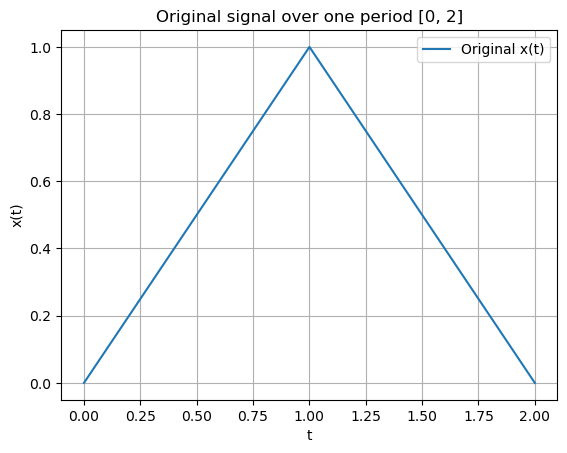

In [3]:
t_plot = np.linspace(0, T, 4000, endpoint=True)
x_true = x_periodic(t_plot)

plt.figure()
plt.plot(t_plot, x_true, label="Original x(t)")
plt.title("Original signal over one period [0, 2]")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()

<h2>Step 3 — Compute the average power (energy per period / T)</h2>
<p>
The average power over one period is:
</p>
<p>
P = (1/T) ∫_0^T |x(t)|² dt
</p>
<p>
We compute it numerically using a dense grid and the trapezoidal rule.
(For this signal, the exact result is P = 1/3.)
</p>


In [4]:
N_int = 200_000
t_int = np.linspace(0, T, N_int, endpoint=True)
x_int = x_periodic(t_int)

P_total = (1.0/T) * np.trapz(np.abs(x_int)**2, t_int)
print("Average power P_total ≈", P_total)

Average power P_total ≈ 0.333333333325


/var/folders/dz/2hhqhj5x03nfm_4n9jxztch00000gn/T/ipykernel_50544/1781631264.py:5: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  P_total = (1.0/T) * np.trapz(np.abs(x_int)**2, t_int)


<h2>Step 4 — Compute complex exponential Fourier coefficients c_k</h2>
<p>
Complex exponential Fourier series:
</p>
<p>
x(t) = Σ c_k e^{j k ω0 t},   where ω0 = 2π/T
</p>
<p>
Coefficients:
</p>
<p>
c_k = (1/T) ∫_0^T x(t) e^{-j k ω0 t} dt
</p>
<p>
We compute c_k numerically using the same dense grid + trapezoidal integration.
</p>


In [5]:
def compute_ck(K, t_grid, x_grid):
    """
    Compute c_k for k = -K..K numerically:
      c_k = (1/T) ∫_0^T x(t) e^{-j k w0 t} dt
    """
    k_vals = np.arange(-K, K+1)
    c_vals = np.zeros_like(k_vals, dtype=np.complex128)

    for i, k in enumerate(k_vals):
        integrand = x_grid * np.exp(-1j * k * w0 * t_grid)
        c_vals[i] = (1.0/T) * np.trapz(integrand, t_grid)

    return k_vals, c_vals

<h2>Step 5 — Reconstruct the truncated Fourier approximation</h2>
<p>
Using coefficients for k = -K..K (which gives 2K+1 terms), we reconstruct:
</p>
<p>
x_K(t) = Σ_{k=-K..K} c_k e^{j k ω0 t}
</p>
<p>
The true signal is real; the reconstruction may have tiny imaginary numerical error, so we use the real part for plotting.
</p>

In [6]:
def reconstruct(t, k_vals, c_vals):
    """
    Reconstruct x_hat(t) = sum c_k e^{j k w0 t}
    """
    t = np.asarray(t)
    E = np.exp(1j * np.outer(k_vals, w0 * t))   # shape: (len(k_vals), len(t))
    x_hat = (c_vals[:, None] * E).sum(axis=0)
    return x_hat

<h2>Step 6 — Approximation percentage using Parseval (energy capture)</h2>
<p>
Parseval relation (average power):
</p>
<p>
P_total = Σ |c_k|²
</p>
<p>
For the truncated set k=-K..K, the captured power is:
</p>
<p>
P_partial = Σ_{k=-K..K} |c_k|²
</p>
<p>
Approximation percentage = 100 * (P_partial / P_total)
</p>
<p>
The problem asks for 3, 5, 7, and 17 terms. Since number of terms = 2K+1:
</p>
<ul>
  <li>3 terms → K = 1</li>
  <li>5 terms → K = 2</li>
  <li>7 terms → K = 3</li>
  <li>17 terms → K = 8</li>
</ul>
</p>


In [7]:
terms_list = [3, 5, 7, 17]
K_list = [(m - 1)//2 for m in terms_list]

summary = []

for m, K in zip(terms_list, K_list):
    k_vals, c_vals = compute_ck(K, t_int, x_int)
    P_partial = np.sum(np.abs(c_vals)**2)
    percentage = 100.0 * (P_partial / P_total)
    summary.append((m, K, percentage))

print("Approximation percentages (Parseval power capture):")
for m, K, pct in summary:
    print(f"{m:>2} terms (K={K:>2})  ->  {pct:8.3f}%")

Approximation percentages (Parseval power capture):
 3 terms (K= 1)  ->    99.638%
 5 terms (K= 2)  ->    99.638%
 7 terms (K= 3)  ->    99.943%
17 terms (K= 8)  ->    99.992%


/var/folders/dz/2hhqhj5x03nfm_4n9jxztch00000gn/T/ipykernel_50544/3364241540.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c_vals[i] = (1.0/T) * np.trapz(integrand, t_grid)


<h2>Step 7 — Plot approximations for 3, 5, 7, and 17 terms (each separately)</h2>
<p>
For each truncation level, we plot the original signal and its Fourier approximation over one period [0,2].
</p>

/var/folders/dz/2hhqhj5x03nfm_4n9jxztch00000gn/T/ipykernel_50544/3364241540.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c_vals[i] = (1.0/T) * np.trapz(integrand, t_grid)


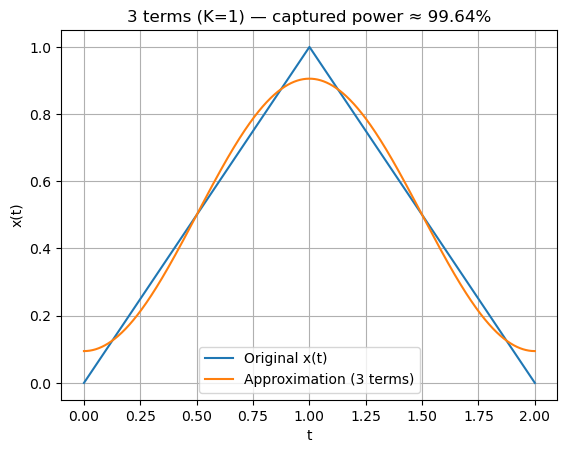

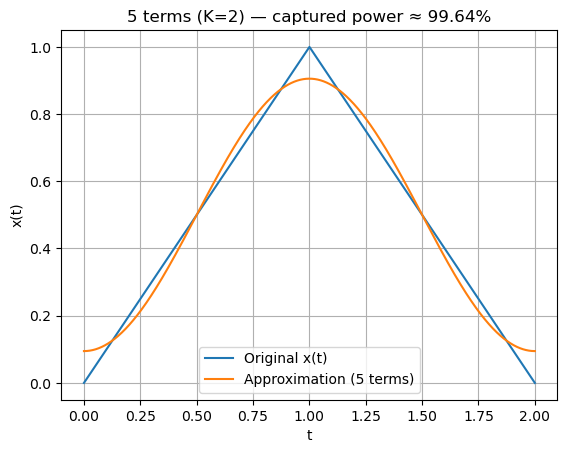

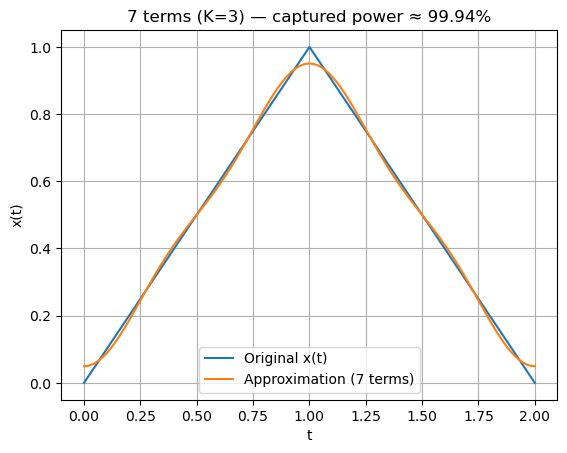

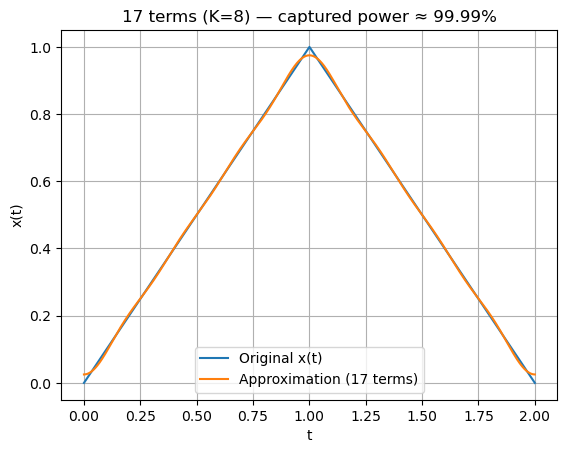

In [8]:
for m, K, pct in summary:
    k_vals, c_vals = compute_ck(K, t_int, x_int)
    x_hat = reconstruct(t_plot, k_vals, c_vals).real

    plt.figure()
    plt.plot(t_plot, x_true, label="Original x(t)")
    plt.plot(t_plot, x_hat, label=f"Approximation ({m} terms)")
    plt.title(f"{m} terms (K={K}) — captured power ≈ {pct:.2f}%")
    plt.xlabel("t")
    plt.ylabel("x(t)")
    plt.grid(True)
    plt.legend()
    plt.show()

<h2>Optional Step 8 — Plot over multiple periods (visual check)</h2>
<p>
If you want to see the periodic extension and approximation behavior across multiple periods, plot over [0, 6] (3 periods).
This helps confirm periodic reconstruction and any Gibbs-like ripple near corners.
</p>

/var/folders/dz/2hhqhj5x03nfm_4n9jxztch00000gn/T/ipykernel_50544/3364241540.py:11: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  c_vals[i] = (1.0/T) * np.trapz(integrand, t_grid)


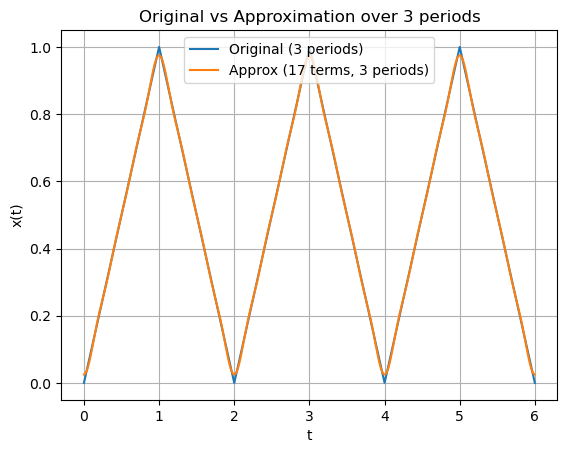

In [9]:
t_multi = np.linspace(0, 3*T, 8000, endpoint=True)
x_multi_true = x_periodic(t_multi)

# Example: 17 terms
K = 8
k_vals, c_vals = compute_ck(K, t_int, x_int)
x_multi_hat = reconstruct(t_multi, k_vals, c_vals).real

plt.figure()
plt.plot(t_multi, x_multi_true, label="Original (3 periods)")
plt.plot(t_multi, x_multi_hat, label="Approx (17 terms, 3 periods)")
plt.title("Original vs Approximation over 3 periods")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.grid(True)
plt.legend()
plt.show()

# ===Cell 5 - Result Analysis ===


<p>
This section analyzes the results obtained from approximating the given periodic
signal using a finite number of complex exponential Fourier series terms.
The approximation was evaluated for different values of <b>N = 3, 5, 7, 17</b>.
</p>

<h3>Effect of Number of Harmonics</h3>
<p>
As the number of Fourier series terms increases, the reconstructed signal
<i>x<sub>N</sub>(t)</i> becomes progressively closer to the original signal <i>x(t)</i>.
For small values of <i>N</i> (e.g., N = 3), the approximation captures only the
general shape of the signal, resulting in noticeable deviations, especially
near points where the slope changes.
</p>

<p>
With larger values of <i>N</i> (such as N = 7 and N = 17), higher-frequency
components are included. These additional harmonics significantly improve
the reconstruction accuracy and reduce the overall approximation error.
</p>

<h3>Energy-Based Approximation Metric</h3>
<p>
The approximation quality was quantified using an energy-based metric,
defined as the ratio of the energy of the reconstructed signal to the energy
of the original signal over one period.
</p>

<p>
The results show that the approximation percentage increases monotonically
with <i>N</i>. This behavior is consistent with Fourier series theory, where
adding more terms allows the series to capture more of the signal’s energy.
For sufficiently large <i>N</i>, the approximation percentage approaches
100%, indicating an almost perfect reconstruction.
</p>

<h3>Numerical Accuracy Considerations</h3>
<p>
Minor discrepancies between the reconstructed and original signals can be
attributed to numerical integration and finite sampling resolution.
Small imaginary components observed in the reconstructed signal are expected
and are a consequence of numerical approximation; therefore, only the real
part of <i>x<sub>N</sub>(t)</i> is considered meaningful for analysis.
</p>

<h3>Overall Observation</h3>
<p>
The results confirm that the complex exponential Fourier series provides an
effective representation of the given periodic signal. Increasing the number
of harmonics improves both visual and quantitative accuracy, demonstrating
the convergence of the Fourier series to the original signal in terms of
energy and waveform shape.
</p>